<a href="https://colab.research.google.com/github/Moojin-Bin/Gaussian_Mixture_Models_for_Finance/blob/master/SNIPPET_5_1_Weighting_Function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We know that for a real number $d$, 
$$(1+x)^d = \sum_{k=0}^{\infty}{d \choose k}x^k.$$
<br>
Let us define an arithmetic series consists of a dot product
$$\tilde{X_t} = \boldsymbol{\omega} \cdot \boldsymbol{X} = \sum_{k=0}^{\infty} \omega_{k} X_{t-k}$$
with weights
$$ \boldsymbol{\omega} = \left\{ 1, -d, {{d(d-1)} \over 2 !}, -{{d(d-1)(d-2)} \over 3!}, ..., (-1)^k \prod_{i=0}^{k-1} {{d-i} \over k!},...,  \right\}$$
and values $\boldsymbol{X}$
$$\boldsymbol{X} = \left\{ X_t, X_{t-1}, X_{t-2}, X_{t-3}, ..., X_{t-k}, ... \right\}.$$
<br>
We can see that the weights, $\boldsymbol{\omega}$, can be generated iteratively as:
$$\omega_{k} = -\omega_{k-1}{{d-k+1} \over k}$$
for $k=0, 1, 2, ...,\infty,$ with $\omega_{0} = 1$.

In [4]:
import numpy as np
import pandas as pd

In [5]:
def getWeights(d, size):
    w = [1.]
    for k in range(1, size):
        w_ = -w[-1] / k*(d-k+1)
        w.append(w_)
    w=np.array(w[::-1]).reshape(-1, 1)
    return w

In [20]:
def plotWeights(dRange, nPlots, size):
    w = pd.DataFrame()
    for d in np.linspace(dRange[0], dRange[1], nPlots):
        w_ = getWeights(d, size = size)
        w_ = pd.DataFrame(w_, index=range(w_.shape[0])[::-1], columns=[d])
        w = w.join(w_, how='outer')
    ax = w.plot(marker='.')
    ax.set_ylabel(r'$\omega_k$')
    ax.set_xlabel(r'$k$')
    ax.legend()
    return

**FIGURE 5.1** Each line is associated with a particular value of $d \in [0, 1],$ in $0.25$ increments.

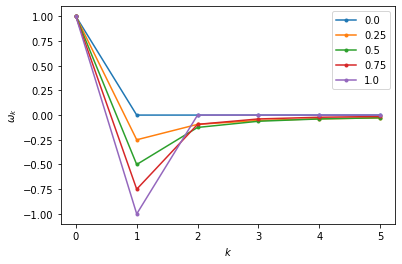

In [21]:
plotWeights([0, 1], 5, 6)

**FIGURE 5.1** Each line is associated with a particular value of $d \in [1, 2],$ in $0.25$ increments.

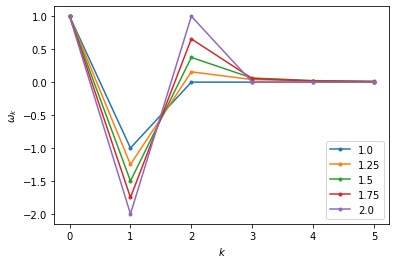

In [22]:
plotWeights([1, 2], 5, 6)